In [ ]:
pip install prophet

In [7]:

# check prophet version
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# load the car sales dataset

# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


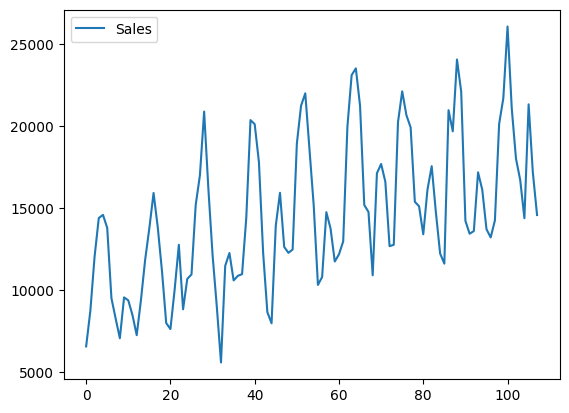

In [6]:
df.plot()
plt.show()

In [10]:
df.columns = ["ds", "y"]

In [12]:
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [13]:
forecast = Prophet()
forecast.fit(df)

15:55:23 - cmdstanpy - INFO - Chain [1] start processing
15:55:23 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = forecast.make_future_dataframe(periods=365)
future.tail()

,ds
468,1969-11-27
469,1969-11-28
470,1969-11-29
471,1969-11-30
472,1969-12-01


In [16]:
forecasted_value = forecast.predict(future)
forecasted_value.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9606.754811,4570.140524,7721.471986,9606.754811,9606.754811,-3462.820038,-3462.820038,-3462.820038,-3462.820038,-3462.820038,-3462.820038,0.0,0.0,0.0,6143.934773
1,1960-02-01,9710.488287,5201.143780,8265.810418,9710.488287,9710.488287,-2952.270627,-2952.270627,-2952.270627,-2952.270627,-2952.270627,-2952.270627,0.0,0.0,0.0,6758.217661
2,1960-03-01,9807.529282,11075.575538,14412.457726,9807.529282,9807.529282,2951.061175,2951.061175,2951.061175,2951.061175,2951.061175,2951.061175,0.0,0.0,0.0,12758.590456
3,1960-04-01,9911.262758,13345.963475,16290.469509,9911.262758,9911.262758,4917.289483,4917.289483,4917.289483,4917.289483,4917.289483,4917.289483,0.0,0.0,0.0,14828.552241
4,1960-05-01,10011.649989,14822.671615,17735.022601,10011.649989,10011.649989,6158.162497,6158.162497,6158.162497,6158.162497,6158.162497,6158.162497,0.0,0.0,0.0,16169.812486


In [17]:
forecasted_value[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
468,1969-11-27,16444.517769,14829.877256,18018.653695
469,1969-11-28,16699.004885,15054.598981,18311.717907
470,1969-11-29,16782.272211,15262.942532,18360.960192
471,1969-11-30,16693.995115,15137.066039,18217.007584
472,1969-12-01,16439.059921,14938.140400,17987.811879


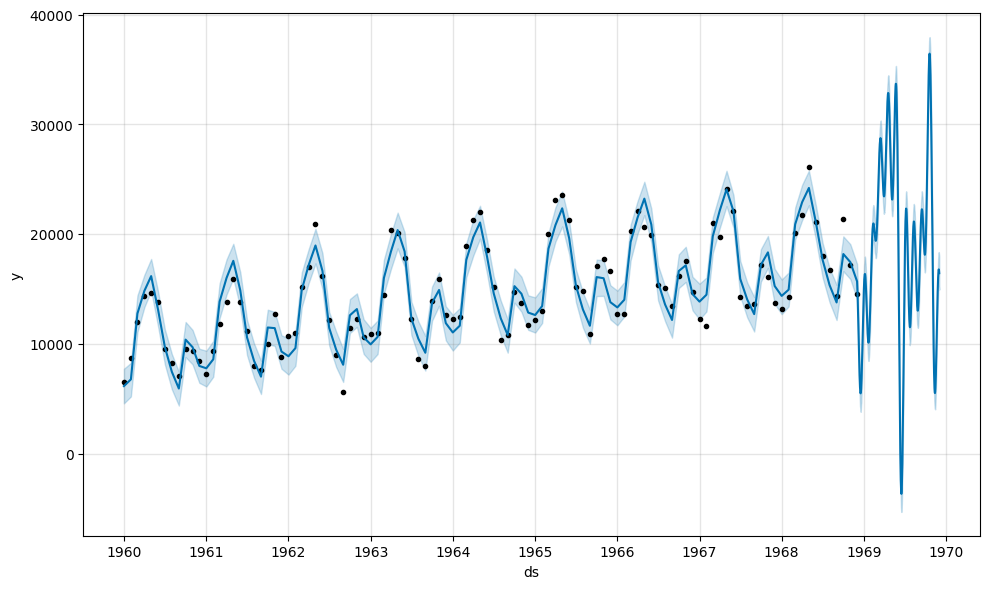

In [19]:
fig1 = forecast.plot(forecasted_value)

plt.show()

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

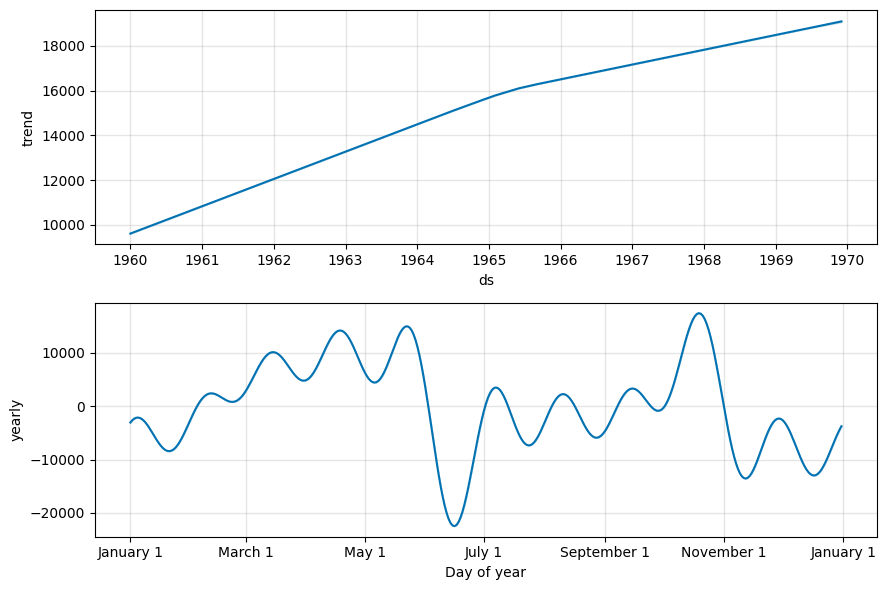

In [20]:
fig2 = forecast.plot_components(forecasted_value)

plt.show()

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(forecast, forecasted_value)

In [22]:

plot_components_plotly(forecast, forecasted_value)



/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

